In [1]:
pip install numpy



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("Loan.csv")
data.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4055,4054,1,Not Graduate,Yes,7000000.0,20300000.0,14,837,7700000.0,2200000.0,19700000.0,5500000.0,Approved
297,296,1,Not Graduate,Yes,300000.0,1000000.0,10,431,400000.0,500000.0,900000.0,100000.0,Rejected
3420,3419,5,Not Graduate,No,3100000.0,12300000.0,18,805,4900000.0,1900000.0,6100000.0,2800000.0,Approved
1516,1515,3,Graduate,No,4700000.0,17400000.0,10,393,12400000.0,5300000.0,18700000.0,5300000.0,Rejected
675,674,1,Not Graduate,Yes,5800000.0,13900000.0,6,345,4000000.0,9300000.0,20900000.0,5500000.0,Rejected
3290,3289,3,Graduate,Yes,4800000.0,14200000.0,12,547,10400000.0,700000.0,9800000.0,2400000.0,Rejected
2700,2699,4,Not Graduate,No,4200000.0,11100000.0,8,526,11600000.0,200000.0,16800000.0,4900000.0,Rejected
4079,4078,1,Graduate,Yes,1800000.0,6300000.0,12,749,4200000.0,200000.0,3800000.0,2700000.0,Approved
3606,3605,5,Graduate,No,700000.0,1700000.0,18,757,1900000.0,200000.0,2100000.0,600000.0,Approved
3794,3793,5,Graduate,No,2800000.0,7200000.0,16,424,900000.0,5000000.0,6100000.0,3200000.0,Rejected


In [7]:
data=data.rename(
    columns={
        'loan_id':'loan_application_id',
        ' no_of_dependents':'financially_dependent_count',
        ' education':'highest_education',
        ' self_employed':'employment_status',
        ' income_annum':'annual_income',
        ' loan_amount':'loan_principal',
        ' loan_term':'loan_duration_months',
        ' cibil_score':'credit_score',
        ' residential_assets_value':'primary_residence_value',
        ' commercial_assets_value':'commercial_property_value',
        ' luxury_assets_value':'high_value_assets',
        ' bank_asset_value':'liquid_assets',
        ' loan_status':'loan_approval_decision'
    }
)
print(data.columns)

Index(['loan_application_id', 'financially_dependent_count',
       'highest_education', 'employment_status', 'annual_income',
       'loan_principal', 'loan_duration_months', 'credit_score',
       'primary_residence_value', 'commercial_property_value',
       'high_value_assets', 'liquid_assets', 'loan_approval_decision'],
      dtype='object')


In [8]:
r,c=data.shape
print(f'Number of Rows is {r} \nNumber of Columns is {c}')


Number of Rows is 4271 
Number of Columns is 13


In [9]:
info_col=data.info()
print(info_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_application_id          4271 non-null   int64  
 1   financially_dependent_count  4271 non-null   int64  
 2   highest_education            4269 non-null   object 
 3   employment_status            4271 non-null   object 
 4   annual_income                4269 non-null   float64
 5   loan_principal               4270 non-null   float64
 6   loan_duration_months         4271 non-null   int64  
 7   credit_score                 4271 non-null   int64  
 8   primary_residence_value      4269 non-null   float64
 9   commercial_property_value    4269 non-null   float64
 10  high_value_assets            4270 non-null   float64
 11  liquid_assets                4270 non-null   float64
 12  loan_approval_decision       4271 non-null   object 
dtypes: float64(6), int

In [10]:
print(data.isnull().sum())

loan_application_id            0
financially_dependent_count    0
highest_education              2
employment_status              0
annual_income                  2
loan_principal                 1
loan_duration_months           0
credit_score                   0
primary_residence_value        2
commercial_property_value      2
high_value_assets              1
liquid_assets                  1
loan_approval_decision         0
dtype: int64


In [11]:
data['annual_income']=data['annual_income'].fillna(data['annual_income'].median())
data['highest_education']=data['highest_education'].fillna(data['highest_education'].mode()[0])
data['loan_principal']=data['loan_principal'].fillna(data['loan_principal'].median())
data['primary_residence_value']=data['primary_residence_value'].fillna(data['primary_residence_value'].mean())
data['commercial_property_value']=data['commercial_property_value'].fillna(data['commercial_property_value'].mean())
data['high_value_assets']=data['high_value_assets'].fillna(data['high_value_assets'].median())
data['liquid_assets']=data['liquid_assets'].fillna(data['liquid_assets'].median())

In [12]:
duplicate = data[data.duplicated(subset=data.columns[1:])]
duplicate

,loan_application_id,financially_dependent_count,highest_education,employment_status,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets,liquid_assets,loan_approval_decision
1,1,2,Graduate,No,9600000.0,29900000.0,12,778,2400000.0,17600000.0,22700000.0,8000000.0,Approved
2,1,2,Graduate,No,9600000.0,29900000.0,12,778,2400000.0,17600000.0,22700000.0,8000000.0,Approved


In [13]:
data.drop_duplicates(inplace=True,subset=data.columns[1:])

In [14]:
data['highest_education']=data['highest_education'].map({' Graduate':1,' Not Graduate':0})
data['loan_approval_decision']=data['loan_approval_decision'].map({' Approved':1,' Rejected':0})
data['employment_status']=data['employment_status'].map({' Yes':1,' No':0})

In [15]:
Q1 = data['commercial_property_value'].quantile(0.25)
Q3 = data['commercial_property_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['commercial_property_value'] < lower_bound) | (data['commercial_property_value'] > upper_bound)]
data['commercial_property_value'] = np.where((data['commercial_property_value'] < lower_bound) | (data['commercial_property_value'] > upper_bound), data['commercial_property_value'].median(), data['commercial_property_value'])

In [16]:
median = data['primary_residence_value'].median()
mad = (np.abs(data['primary_residence_value'] - median)).median()
modified_z_scores = 0.6745 * (data['primary_residence_value'] - median) / mad
outliers = data[modified_z_scores > 3.5]
data['primary_residence_value'] = np.where(modified_z_scores > 3.5, data['primary_residence_value'].median(), data['primary_residence_value'])


In [17]:
Q1 = data['liquid_assets'].quantile(0.25)
Q3 = data['liquid_assets'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['liquid_assets'] < lower_bound) | (data['liquid_assets'] > upper_bound)]
data['liquid_assets'] = np.where((data['liquid_assets'] < lower_bound) | (data['liquid_assets'] > upper_bound), data['liquid_assets'].median(), data['liquid_assets'])

In [18]:
data.sample(10)

,loan_application_id,financially_dependent_count,highest_education,employment_status,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets,liquid_assets,loan_approval_decision
1364,1363,2,0,0,600000.0,1100000.0,10,800,1200000.0,200000.0,2300000.0,900000.0,1
405,404,4,0,1,200000.0,700000.0,10,672,200000.0,200000.0,300000.0,300000.0,1
3949,3948,2,1,0,5300000.0,16700000.0,18,339,4600000.0,3300000.0,12000000.0,4100000.0,0
2376,2375,0,0,0,4800000.0,19000000.0,12,650,7000000.0,1000000.0,15600000.0,4800000.0,1
4205,4204,4,1,1,6400000.0,21900000.0,6,437,7000000.0,10000000.0,24600000.0,4100000.0,0
1402,1401,3,0,1,600000.0,2400000.0,12,884,600000.0,800000.0,1400000.0,600000.0,1
1300,1299,2,1,0,2200000.0,4800000.0,6,721,1800000.0,100000.0,6900000.0,2200000.0,1
2835,2834,0,1,1,7500000.0,28900000.0,10,632,21700000.0,10700000.0,24700000.0,9900000.0,1
3472,3471,3,0,1,8300000.0,25900000.0,8,696,14400000.0,12200000.0,23500000.0,7100000.0,1
793,792,4,1,1,9300000.0,35500000.0,6,547,2800000.0,3700000.0,27000000.0,13900000.0,0


In [19]:
X=data.drop('loan_approval_decision',axis=1)
X

,loan_application_id,financially_dependent_count,highest_education,employment_status,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets,liquid_assets
0,1,2,1,0,9600000.0,29900000.0,12,778,2400000.0,3700000.0,22700000.0,8000000.0
3,2,0,0,1,4100000.0,12200000.0,8,417,2700000.0,2200000.0,8800000.0,3300000.0
4,3,3,1,0,9100000.0,29700000.0,20,506,7100000.0,4500000.0,33300000.0,12800000.0
5,4,3,1,0,8200000.0,30700000.0,8,467,18200000.0,3300000.0,23300000.0,7900000.0
6,5,5,0,1,9800000.0,24200000.0,20,382,12400000.0,8200000.0,29400000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4265,5,1,1,1000000.0,2300000.0,12,317,2800000.0,500000.0,3300000.0,800000.0
4267,4266,0,0,1,3300000.0,11300000.0,20,559,4200000.0,2900000.0,11000000.0,1900000.0
4268,4267,2,0,0,6500000.0,23900000.0,18,457,1200000.0,12400000.0,18100000.0,7300000.0
4269,4268,1,0,0,4100000.0,12800000.0,8,780,8200000.0,700000.0,14100000.0,5800000.0


In [20]:
y=data['loan_approval_decision']
y

0       1
3       0
4       0
5       0
6       0
       ..
4266    0
4267    1
4268    0
4269    1
4270    1
Name: loan_approval_decision, Length: 4269, dtype: int64

# Divide datasets into training and testing subsets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,loan_application_id,financially_dependent_count,highest_education,employment_status,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets,liquid_assets
923,922,3,0,1,2100000.0,6100000.0,8,346,5500000.0,600000.0,4500000.0,2900000.0
3121,3120,4,0,0,9800000.0,29400000.0,8,592,5600000.0,16700000.0,35900000.0,9000000.0
3977,3976,2,1,1,6100000.0,22300000.0,8,694,16200000.0,10900000.0,22900000.0,7200000.0
758,757,1,0,1,4700000.0,18700000.0,20,445,2100000.0,0.0,11100000.0,4000000.0
2765,2764,3,0,1,4600000.0,13600000.0,20,729,1300000.0,8900000.0,17200000.0,5900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3446,3445,0,1,1,1300000.0,4700000.0,16,530,3200000.0,1000000.0,3800000.0,800000.0
468,467,5,0,1,500000.0,1800000.0,18,411,1000000.0,500000.0,1300000.0,200000.0
3094,3093,4,0,1,8600000.0,20600000.0,16,449,10800000.0,10600000.0,28700000.0,5400000.0
3774,3773,2,0,1,7000000.0,21400000.0,12,541,3700000.0,1300000.0,19800000.0,9600000.0


# Standardize the input data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss=StandardScaler().fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)
X_train

array([[-1.00848785,  0.34896822, -1.00842712, ..., -1.00849003,
        -1.16748001, -0.63727891],
       [ 0.78387483,  0.94198611, -1.00842712, ...,  2.8184626 ,
         2.25365269,  1.25150825],
       [ 1.48190143, -0.24404967,  0.99164331, ...,  1.43980886,
         0.83726017,  0.69416122],
       ...,
       [ 0.76185764,  0.94198611, -1.00842712, ...,  1.36849918,
         1.46918914,  0.13681419],
       [ 1.31636475, -0.24404967, -1.00842712, ..., -0.84210078,
         0.49950503,  1.43729059],
       [-1.0582304 ,  0.94198611,  0.99164331, ..., -0.27162337,
         1.03337606, -0.1108956 ]], shape=(2860, 12))

In [25]:
X_test

array([[-0.37080467,  1.53500401,  0.99164331, ...,  1.22587983,
         0.05279662,  0.72512494],
       [-0.80299404, -0.24404967,  0.99164331, ...,  1.10703037,
         0.28159849,  0.5393426 ],
       [-1.5083597 ,  0.34896822,  0.99164331, ...,  2.69961314,
         1.44739848,  0.50837887],
       ...,
       [-1.72037712,  0.34896822, -1.00842712, ...,  0.89310134,
         0.35786578,  1.00379846],
       [ 0.43486154, -0.83706756, -1.00842712, ...,  0.89310134,
         0.15085456, -0.20378677],
       [ 0.1910415 ,  1.53500401,  0.99164331, ..., -0.36670294,
        -0.69898094, -0.91595242]], shape=(1409, 12))

In [26]:
accuracyList=[]

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Logistic Regression',accuracy])
accuracyList           

Predicted outcomes: [0 1 0 ... 1 1 1]
Accuracy: 0.9056068133427964

Confusion Matrix:
 [[455  67]
 [ 66 821]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       522
           1       0.92      0.93      0.93       887

    accuracy                           0.91      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.91      0.91      0.91      1409



[['Logistic Regression', 0.9056068133427964]]

# KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['KNeighbors Classifier',accuracy])
accuracyList  

Predicted outcomes: [0 0 0 ... 1 0 1]
Accuracy: 0.886444286728176

Confusion Matrix:
 [[472  50]
 [110 777]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       522
           1       0.94      0.88      0.91       887

    accuracy                           0.89      1409
   macro avg       0.88      0.89      0.88      1409
weighted avg       0.89      0.89      0.89      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176]]

# DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Decision Tree Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9801277501774308

Confusion Matrix:
 [[503  19]
 [  9 878]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       522
           1       0.98      0.99      0.98       887

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308]]

# Decision Tree Classifier With Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
 
param={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,None],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='accuracy')
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'splitter': 'best'}

In [33]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Decision Tree Classifier With Tuning',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9446415897799858

Confusion Matrix:
 [[483  39]
 [ 39 848]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       522
           1       0.96      0.96      0.96       887

    accuracy                           0.94      1409
   macro avg       0.94      0.94      0.94      1409
weighted avg       0.94      0.94      0.94      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858]]

# Support Vector Classifier

In [34]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Support Vector Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9332860184528035

Confusion Matrix:
 [[483  39]
 [ 55 832]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       522
           1       0.96      0.94      0.95       887

    accuracy                           0.93      1409
   macro avg       0.93      0.93      0.93      1409
weighted avg       0.93      0.93      0.93      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858],
 ['Support Vector Classifier', 0.9332860184528035]]

# kernels SVC 

In [35]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f"\nUsing {kernel} kernel:")
    svc = SVC(kernel=kernel) 
    svc.fit(X_train, y_train)
    # Predict and evaluate
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


Using linear kernel:
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       522
           1       0.94      0.92      0.93       887

    accuracy                           0.91      1409
   macro avg       0.90      0.91      0.91      1409
weighted avg       0.91      0.91      0.91      1409


Using poly kernel:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       522
           1       0.92      0.91      0.92       887

    accuracy                           0.90      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.90      0.90      0.90      1409


Using rbf kernel:
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       522
           1       0.96      0.94      0.95       887

    

# SVC With Tuning


In [36]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [0.1, 1, 10, 1000],
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
             }
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s


[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.913 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.927 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.914 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.920 total time=   0.5s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.617 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.759 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.727 total time=   0.1s
[CV 3/5] END ....C=0.1, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['SVC With Tuning',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9453513129879347

Confusion Matrix:
 [[482  40]
 [ 37 850]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       522
           1       0.96      0.96      0.96       887

    accuracy                           0.95      1409
   macro avg       0.94      0.94      0.94      1409
weighted avg       0.95      0.95      0.95      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858],
 ['Support Vector Classifier', 0.9332860184528035],
 ['SVC With Tuning', 0.9453513129879347]]

# GaussianNB

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Naive Bayes',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9347054648687012

Confusion Matrix:
 [[490  32]
 [ 60 827]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       522
           1       0.96      0.93      0.95       887

    accuracy                           0.93      1409
   macro avg       0.93      0.94      0.93      1409
weighted avg       0.94      0.93      0.94      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858],
 ['Support Vector Classifier', 0.9332860184528035],
 ['SVC With Tuning', 0.9453513129879347],
 ['Naive Bayes', 0.9347054648687012]]

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Random Forest Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9709013484740951

Confusion Matrix:
 [[500  22]
 [ 19 868]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       522
           1       0.98      0.98      0.98       887

    accuracy                           0.97      1409
   macro avg       0.97      0.97      0.97      1409
weighted avg       0.97      0.97      0.97      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858],
 ['Support Vector Classifier', 0.9332860184528035],
 ['SVC With Tuning', 0.9453513129879347],
 ['Naive Bayes', 0.9347054648687012],
 ['Random Forest Classifier', 0.9709013484740951]]

# AdaBoostClassifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Ada Boost Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9659332860184529

Confusion Matrix:
 [[498  24]
 [ 24 863]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       522
           1       0.97      0.97      0.97       887

    accuracy                           0.97      1409
   macro avg       0.96      0.96      0.96      1409
weighted avg       0.97      0.97      0.97      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858],
 ['Support Vector Classifier', 0.9332860184528035],
 ['SVC With Tuning', 0.9453513129879347],
 ['Naive Bayes', 0.9347054648687012],
 ['Random Forest Classifier', 0.9709013484740951],
 ['Ada Boost Classifier', 0.9659332860184529]]

# GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Gradient Boosting Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9744499645138396

Confusion Matrix:
 [[496  26]
 [ 10 877]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       522
           1       0.97      0.99      0.98       887

    accuracy                           0.97      1409
   macro avg       0.98      0.97      0.97      1409
weighted avg       0.97      0.97      0.97      1409



[['Logistic Regression', 0.9056068133427964],
 ['KNeighbors Classifier', 0.886444286728176],
 ['Decision Tree Classifier', 0.9801277501774308],
 ['Decision Tree Classifier With Tuning', 0.9446415897799858],
 ['Support Vector Classifier', 0.9332860184528035],
 ['SVC With Tuning', 0.9453513129879347],
 ['Naive Bayes', 0.9347054648687012],
 ['Random Forest Classifier', 0.9709013484740951],
 ['Ada Boost Classifier', 0.9659332860184529],
 ['Gradient Boosting Classifier', 0.9744499645138396]]

# Accuracy Table

In [43]:
df=pd.DataFrame(accuracyList,columns=['Model Name','Accuracy'])
#df=pd.sort(df,on='Accuracy')
df

,Model Name,Accuracy
0,Logistic Regression,0.905607
1,KNeighbors Classifier,0.886444
2,Decision Tree Classifier,0.980128
3,Decision Tree Classifier With Tuning,0.944642
4,Support Vector Classifier,0.933286
5,SVC With Tuning,0.945351
6,Naive Bayes,0.934705
7,Random Forest Classifier,0.970901
8,Ada Boost Classifier,0.965933
9,Gradient Boosting Classifier,0.974450


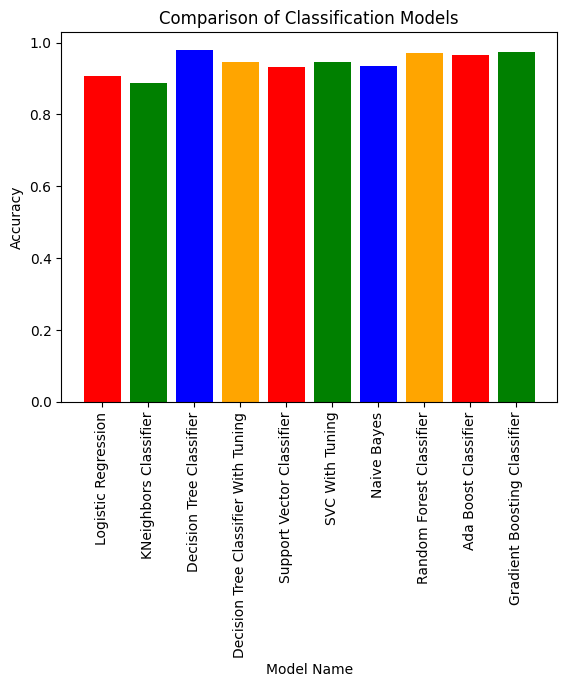

In [44]:
bar_colors=['red','green','blue','orange']
plt.bar(df['Model Name'],df['Accuracy'],color=bar_colors)
plt.xticks(rotation=90)
plt.title("Comparison of Classification Models")
plt.ylabel("Accuracy")
plt.xlabel("Model Name")
plt.show()

### **Conclusion on Classification Model Performance**  

1. **Best Performing Models**:  
   - Decision Tree, Gradient Boosting, and Random Forest had the highest accuracy.  

2. **Hyperparameter Tuning Impact**:  
   - Tuned SVC improved accuracy, while tuned Decision Tree slightly declined.  

3. **Boosting Models (AdaBoost & Gradient Boosting)**:  
   - Strong performance, robust against overfitting, and effective for structured data.  

4. **Support Vector Classifier (SVC)**:  
   - Default SVC performed well, and tuning further improved accuracy.  

5. **Logistic Regression and Naïve Bayes**:  
   - Performed reasonably but were outperformed by tree-based and boosting models.  

6. **K-Nearest Neighbors (KNN)**:  
   - Lowest accuracy due to sensitivity to noise and dataset complexity.  

7. **Overall Insights**:  
   - Tree-based models (Decision Tree, Random Forest, Gradient Boosting) performed best.  
   - Boosting methods (AdaBoost, Gradient Boosting) offer a good balance between performance and generalization.  
   - Hyperparameter tuning can improve or reduce accuracy depending on the model.  

8. **Final Recommendation**:  
   - Decision Tree, Gradient Boosting, and Random Forest are the top choices.  
   - Logistic Regression is an alternative for interpretability.  
   - Boosting methods enhance performance with structured data.